In [2]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
# load dataset
df = pd.read_csv('../dataset/survey.csv')

# rows and columns of the data
print(df.shape)

# visualise the dataset
df.head()

(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [5]:
columns_to_remove = ['Timestamp', 'Country', 'state', 'work_interfere', 'tech_company', 'care_options', 'anonymity', 'phys_health_consequence', 'mental_health_interview', 'phys_health_interview', 'obs_consequence', 'comments']
simplified_df = df.drop(columns=columns_to_remove)

In [6]:
print(simplified_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   no_employees               1259 non-null   object
 6   remote_work                1259 non-null   object
 7   benefits                   1259 non-null   object
 8   wellness_program           1259 non-null   object
 9   seek_help                  1259 non-null   object
 10  leave                      1259 non-null   object
 11  mental_health_consequence  1259 non-null   object
 12  coworkers                  1259 non-null   object
 13  supervisor                 1259 non-null   object
 14  mental_v

In [7]:
cat_columns = simplified_df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_columns)

Categorical columns: Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'no_employees', 'remote_work', 'benefits', 'wellness_program',
       'seek_help', 'leave', 'mental_health_consequence', 'coworkers',
       'supervisor', 'mental_vs_physical'],
      dtype='object')


In [8]:
unique_results = []
for col in cat_columns:
    unique_values = simplified_df[col].unique()  
    unique_count = len(unique_values)
    unique_results.append({'Колонка': col, 'Уникальные значения': list(unique_values), 'Количество': unique_count})

results_df = pd.DataFrame(unique_results)

results_df

,Колонка,Уникальные значения,Количество
0,Gender,"[Female, M, Male, male, female, m, Male-ish, m...",49
1,self_employed,"[nan, Yes, No]",3
2,family_history,"[No, Yes]",2
3,treatment,"[Yes, No]",2
4,no_employees,"[6-25, More than 1000, 26-100, 100-500, 1-5, 5...",6
5,remote_work,"[No, Yes]",2
6,benefits,"[Yes, Don't know, No]",3
7,wellness_program,"[No, Don't know, Yes]",3
8,seek_help,"[Yes, Don't know, No]",3
9,leave,"[Somewhat easy, Don't know, Somewhat difficult...",5


In [9]:
simplified_df['Gender'].unique()  

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [10]:
def normalize_gender(gender):
    gender = gender.lower().strip()
    
    male_terms = {'m', 'male', 'man', 'male-ish', 'cis male', 'cis man', 'make', 'msle', 'mal', 'male (cis)', 'guy (-ish) ^_^', 'male leaning androgynous', 'maile', 'male '}
    female_terms = {'f', 'female', 'woman', 'cis female', 'cis-female/femme', 'femake', 'female ', 'female (trans)', 'trans-female', 'femail'}
    
    if gender in male_terms:
        return 'male'
    elif gender in female_terms:
        return 'female'
    elif gender in {'non-binary', 'genderqueer', 'androgyne', 'fluid', 'agender', 'queer', 'all', 'enby', 'neuter', 'nah', 'a little about you', 'ostensibly male, unsure what that really means'}:
        return 'other'
    else:
        return 'other'

In [11]:
# Нормализуем значения гендера
simplified_df['Normalized_Gender'] = simplified_df['Gender'].apply(normalize_gender)
simplified_df['Normalized_Gender'].unique()

array(['female', 'male', 'other'], dtype=object)

In [12]:
simplified_df.head()

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,benefits,wellness_program,seek_help,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,Normalized_Gender
0,37,Female,NaN,No,Yes,6-25,No,Yes,No,Yes,Somewhat easy,No,Some of them,Yes,Yes,female
1,44,M,NaN,No,No,More than 1000,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know,male
2,32,Male,NaN,No,No,6-25,No,No,No,No,Somewhat difficult,No,Yes,Yes,No,male
3,31,Male,NaN,Yes,Yes,26-100,No,No,No,No,Somewhat difficult,Yes,Some of them,No,No,male
4,31,Male,NaN,No,No,100-500,Yes,Yes,Don't know,Don't know,Don't know,No,Some of them,Yes,Don't know,male


In [13]:
def create_custom_mapping(unique_values, col_name):
    if col_name in ['self_employed', 'family_history', 'treatment', 'remote_work', 'mental_health_consequence', 'coworkers', 'supervisor']:
        mapping = {val: 0 if 'no' in str(val).lower() else (2 if 'yes' in str(val).lower() else 1) for val in unique_values}
    
    elif col_name == "no_employees":
        order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
        mapping = {val: idx for idx, val in enumerate(order)}
    
    elif col_name in ["benefits", "seek_help"]:
        order = ['No', "Don't know", 'Yes']
        mapping = {val: idx for idx, val in enumerate(order)}
        
    elif col_name == "leave":
        order = ['Very difficult', 'Somewhat difficult', "Don't know", 'Somewhat easy', 'Very easy']
        mapping = {val: idx for idx, val in enumerate(order)}
    
    elif col_name == "wellness_program":
        order = ['No', "Don't know", 'Yes']
        mapping = {val: idx for idx, val in enumerate(order)}
    
    elif col_name == "mental_health_consequence":
        order = ['No', 'Maybe', 'Yes']
        mapping = {val: idx for idx, val in enumerate(order)}
    
    elif col_name == "coworkers":
        order = ['No', 'Some of them', 'Yes']
        mapping = {val: idx for idx, val in enumerate(order)}
    
    elif col_name == "supervisor":
        order = ['No', 'Some of them', 'Yes']
        mapping = {val: idx for idx, val in enumerate(order)}
    
    elif col_name == "mental_vs_physical":
        order = ['No', "Don't know", 'Yes']
        mapping = {val: idx for idx, val in enumerate(order)}

    elif col_name == "Normalized_Gender":
        order = ['male', 'other', 'female']
        mapping = {val: idx for idx, val in enumerate(order)}

    else:
        mapping = {val: idx for idx, val in enumerate(sorted(unique_values))}
    
    return mapping

In [14]:
numerical_df = simplified_df.copy()
mappings = {}

for col in simplified_df.select_dtypes(include=['object']).columns:
    unique_values = simplified_df[col].unique()
    has_nan = pd.isna(unique_values).any()

    if has_nan:
        unique_values = [val for val in unique_values if pd.notna(val)]
        unique_values.append('NaN')

    custom_mapping = create_custom_mapping(unique_values, col)
    numerical_df[col] = simplified_df[col].map(lambda x: custom_mapping[x] if pd.notna(x) else custom_mapping['NaN'])
    mappings[col] = custom_mapping

numerical_df.head()

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,benefits,wellness_program,seek_help,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,Normalized_Gender
0,37,10,1,0,2,1,0,2,0,2,3,0,1,2,2,2
1,44,16,1,0,0,5,0,1,1,1,2,1,0,0,1,0
2,32,20,1,0,0,1,0,0,0,0,1,0,2,2,0,0
3,31,20,1,2,2,2,0,0,0,0,1,2,1,0,0,0
4,31,20,1,0,0,3,2,2,1,1,2,0,1,2,1,0


In [15]:
print("\nПривязка категорий:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")


Привязка категорий:
Gender: {'A little about you': 0, 'Agender': 1, 'All': 2, 'Androgyne': 3, 'Cis Female': 4, 'Cis Male': 5, 'Cis Man': 6, 'Enby': 7, 'F': 8, 'Femake': 9, 'Female': 10, 'Female ': 11, 'Female (cis)': 12, 'Female (trans)': 13, 'Genderqueer': 14, 'Guy (-ish) ^_^': 15, 'M': 16, 'Mail': 17, 'Make': 18, 'Mal': 19, 'Male': 20, 'Male ': 21, 'Male (CIS)': 22, 'Male-ish': 23, 'Malr': 24, 'Man': 25, 'Nah': 26, 'Neuter': 27, 'Trans woman': 28, 'Trans-female': 29, 'Woman': 30, 'cis male': 31, 'cis-female/femme': 32, 'f': 33, 'femail': 34, 'female': 35, 'fluid': 36, 'm': 37, 'maile': 38, 'male': 39, 'male leaning androgynous': 40, 'msle': 41, 'non-binary': 42, 'ostensibly male, unsure what that really means': 43, 'p': 44, 'queer': 45, 'queer/she/they': 46, 'something kinda male?': 47, 'woman': 48}
self_employed: {'Yes': 2, 'No': 0, 'NaN': 1}
family_history: {'No': 0, 'Yes': 2}
treatment: {'Yes': 2, 'No': 0}
no_employees: {'1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000':

In [25]:
final_df = numerical_df.drop(columns=["Gender"])[(df['Age'] >= 18) & (df['Age'] <= 100)]

In [26]:
final_df.head()

,Age,self_employed,family_history,treatment,no_employees,remote_work,benefits,wellness_program,seek_help,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,Normalized_Gender
0,37,1,0,2,1,0,2,0,2,3,0,1,2,2,2
1,44,1,0,0,5,0,1,1,1,2,1,0,0,1,0
2,32,1,0,0,1,0,0,0,0,1,0,2,2,0,0
3,31,1,2,2,2,0,0,0,0,1,2,1,0,0,0
4,31,1,0,0,3,2,2,1,1,2,0,1,2,1,0


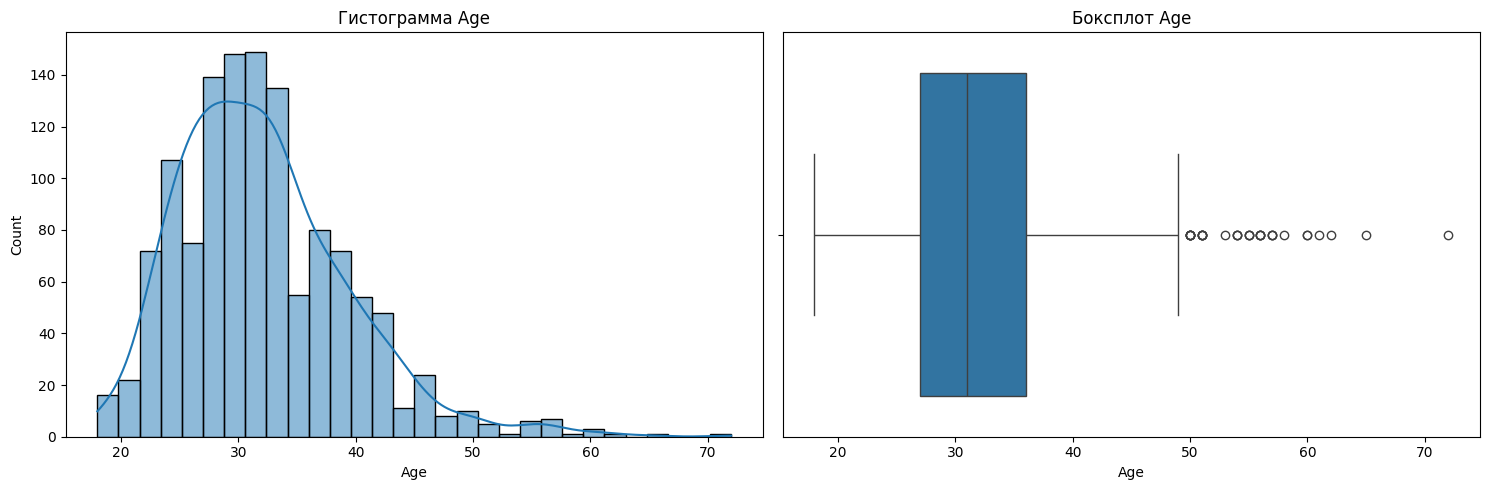

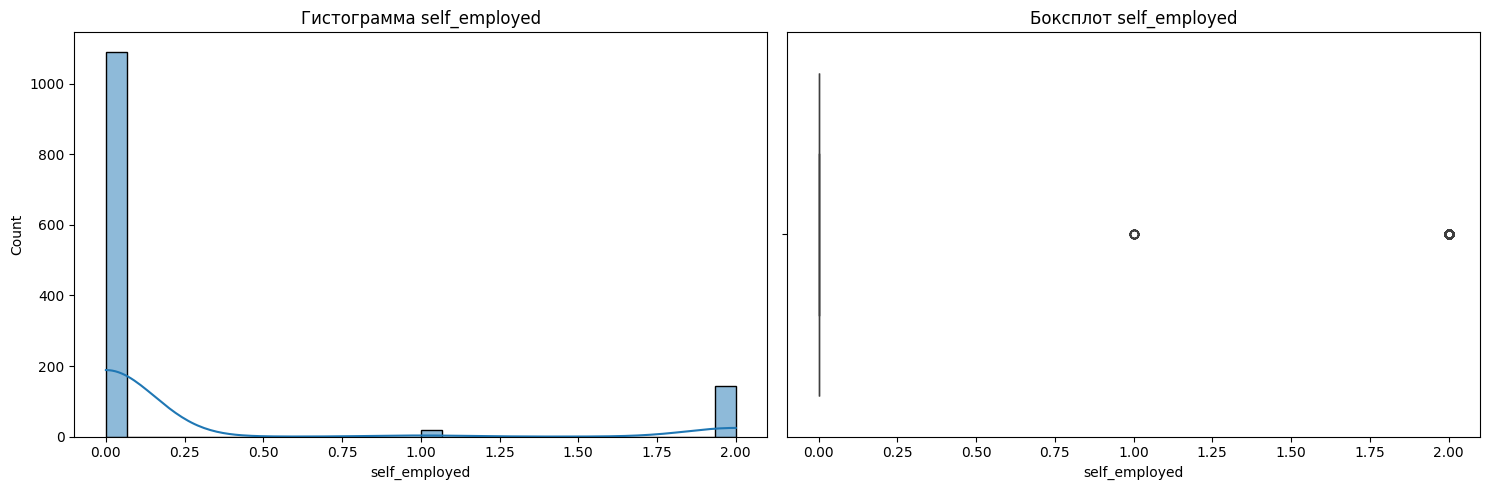

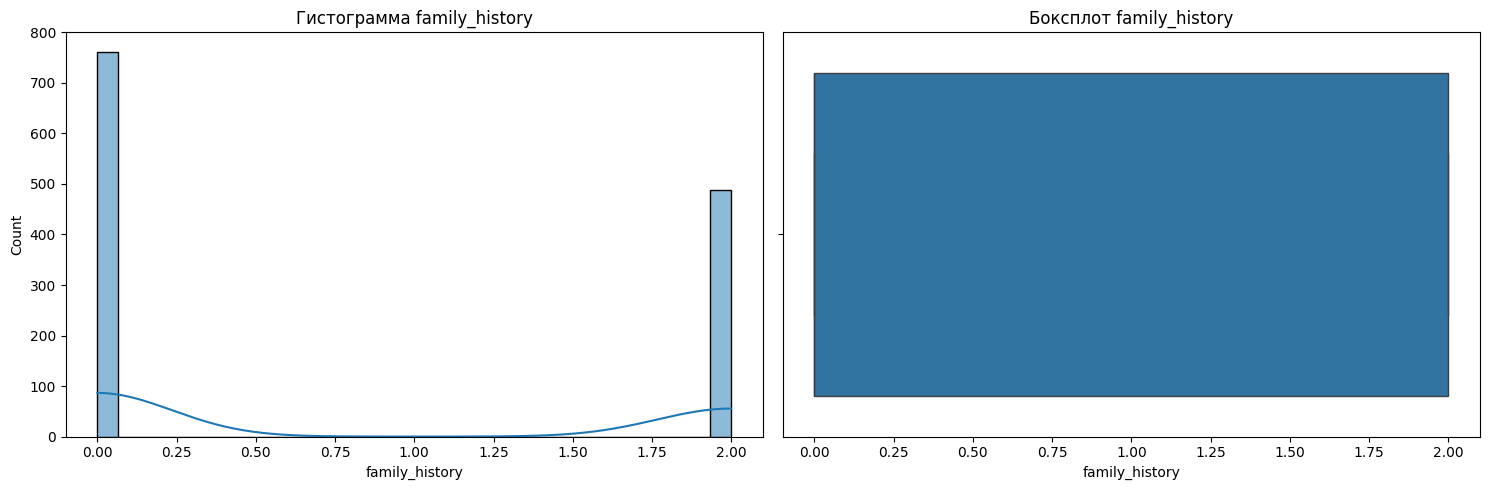

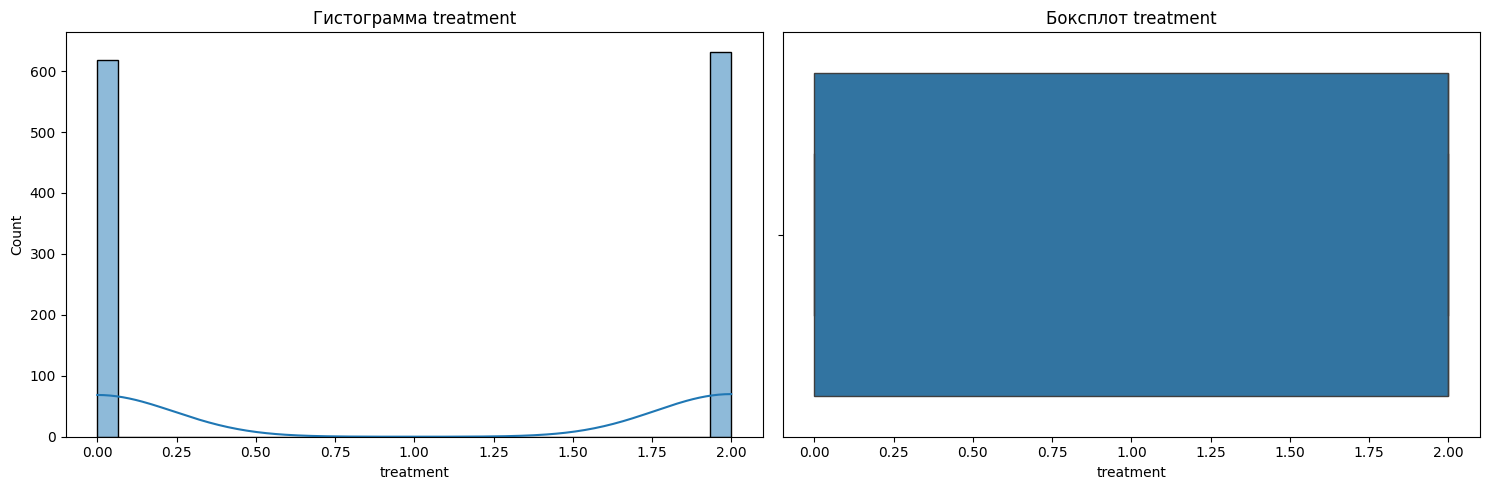

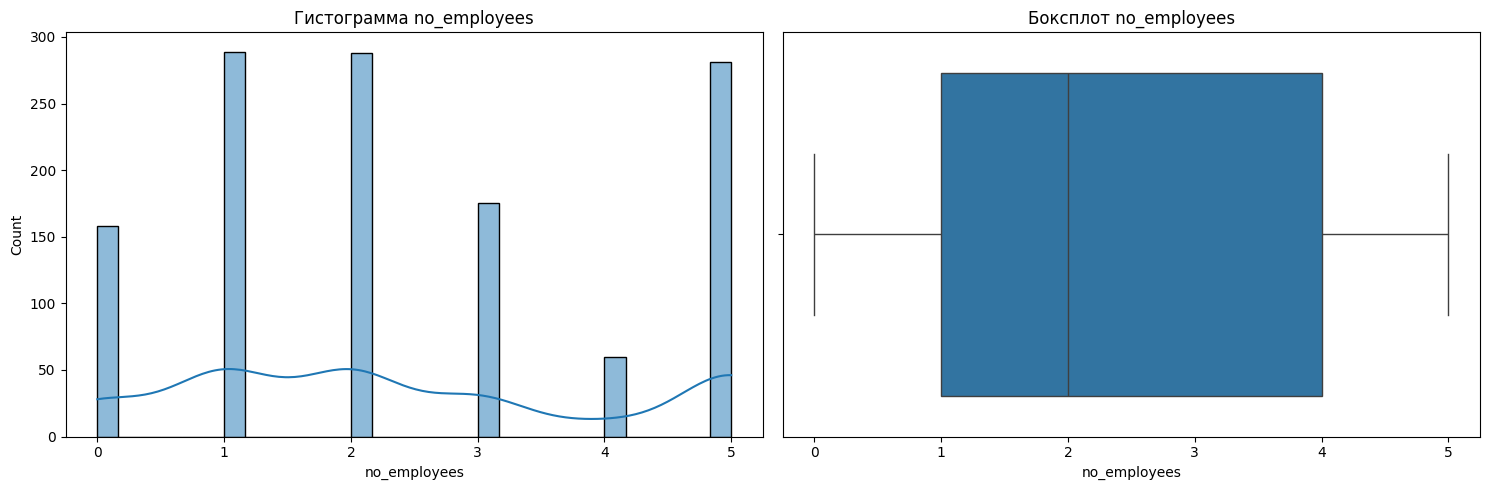

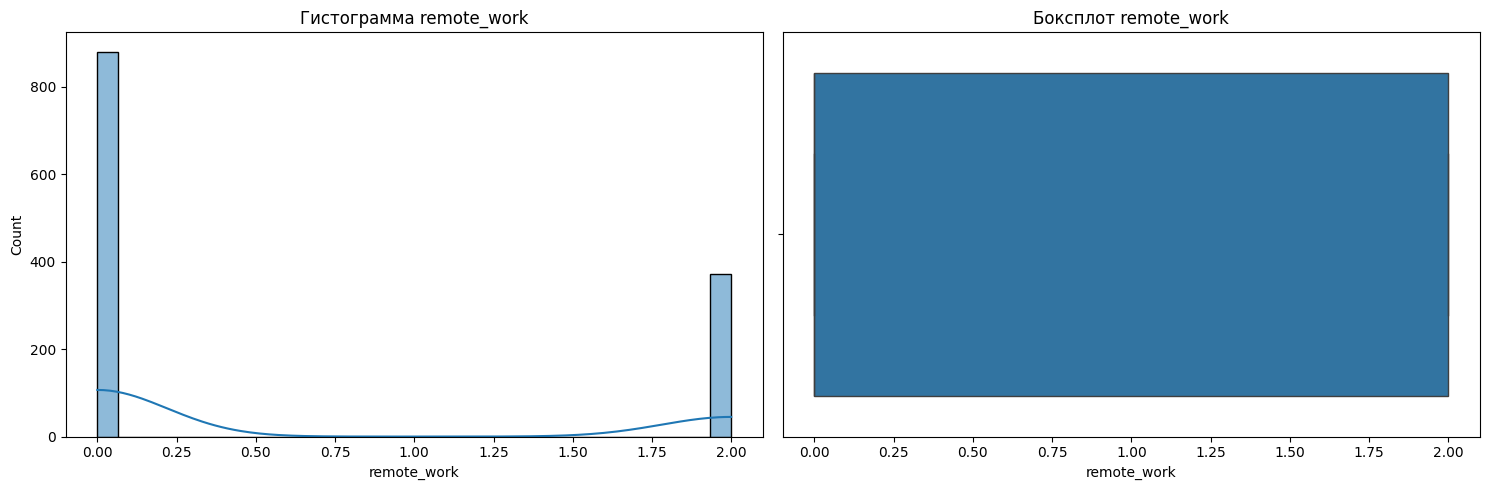

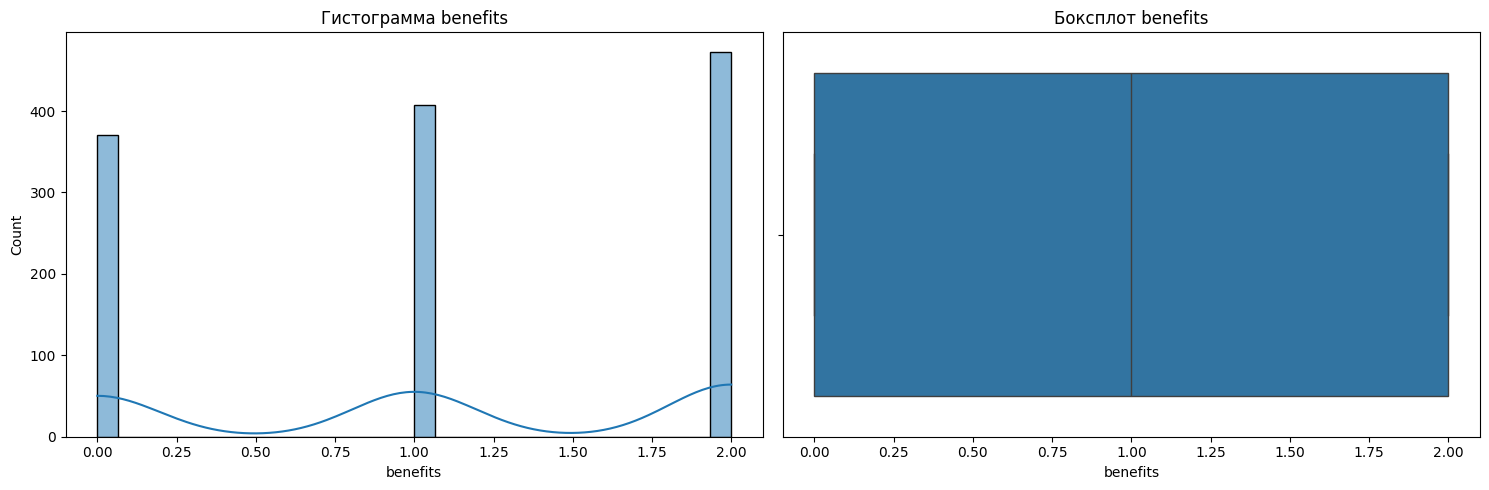

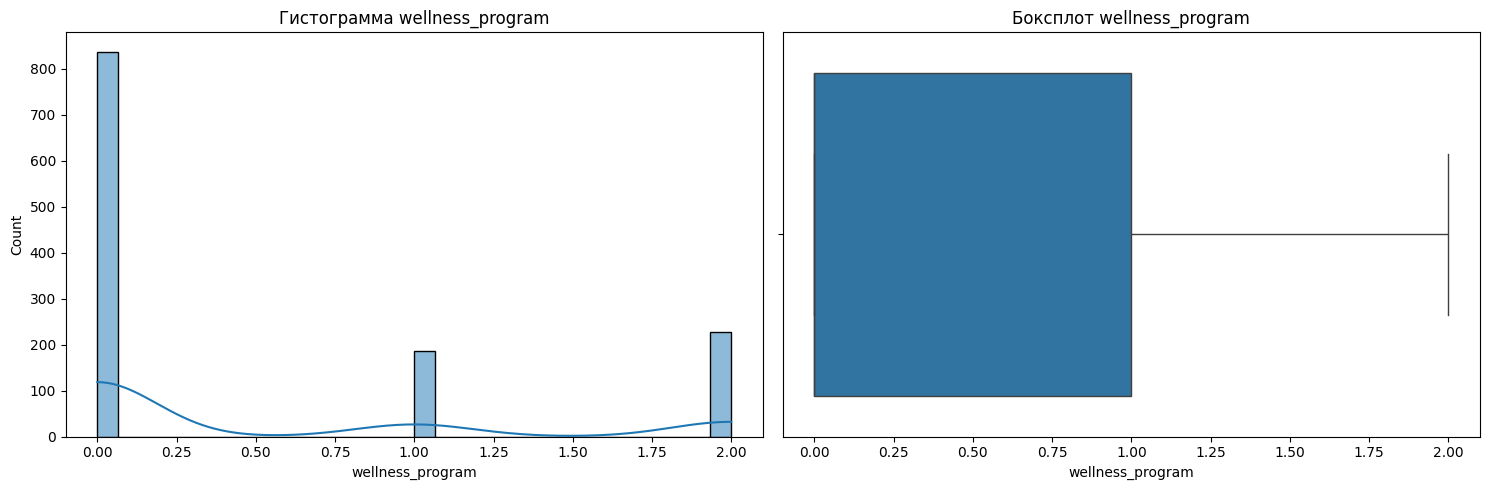

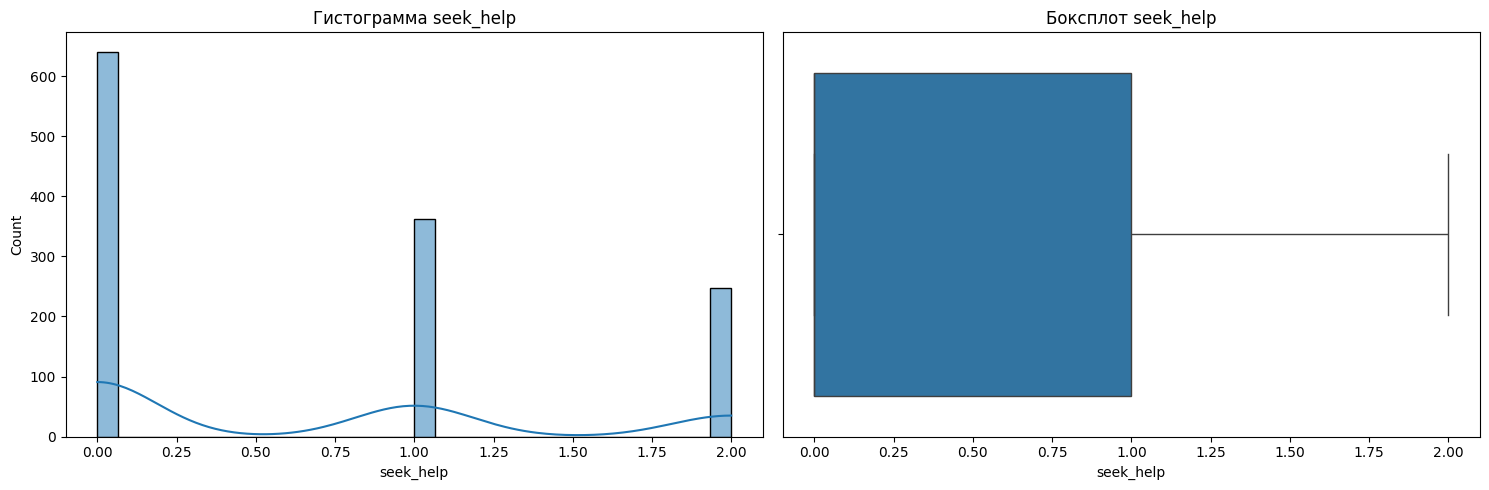

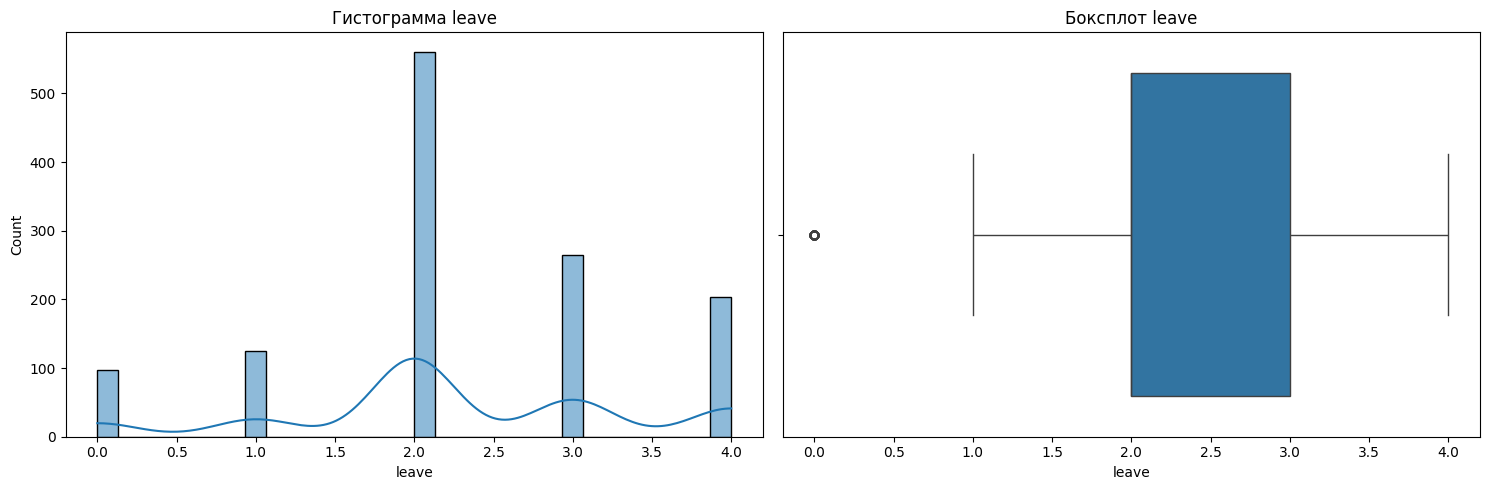

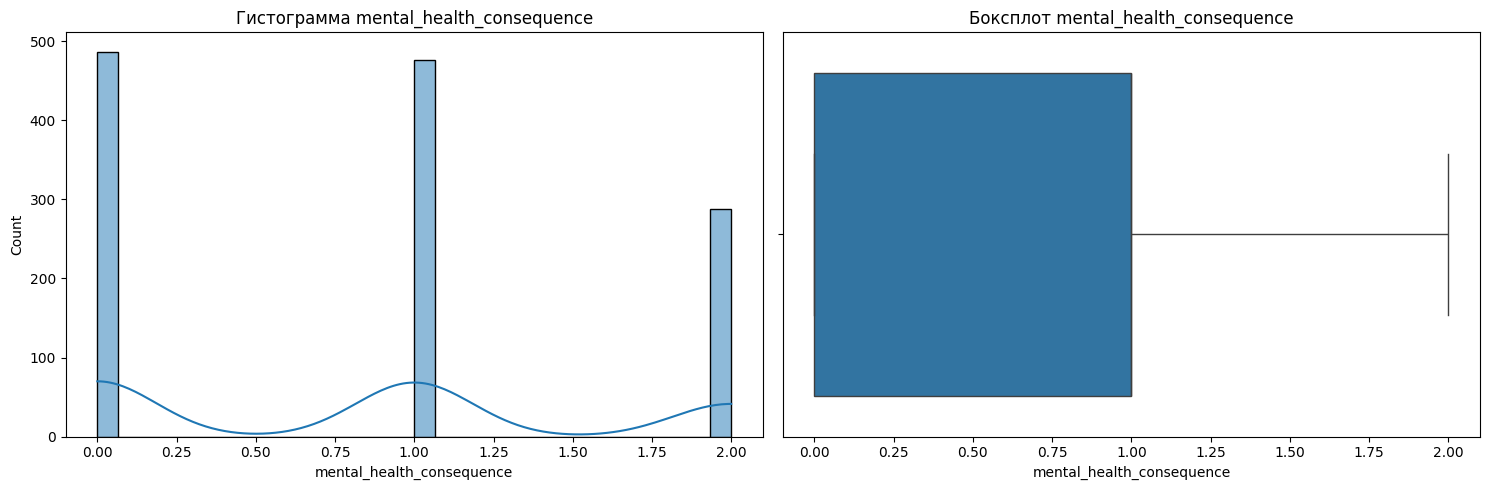

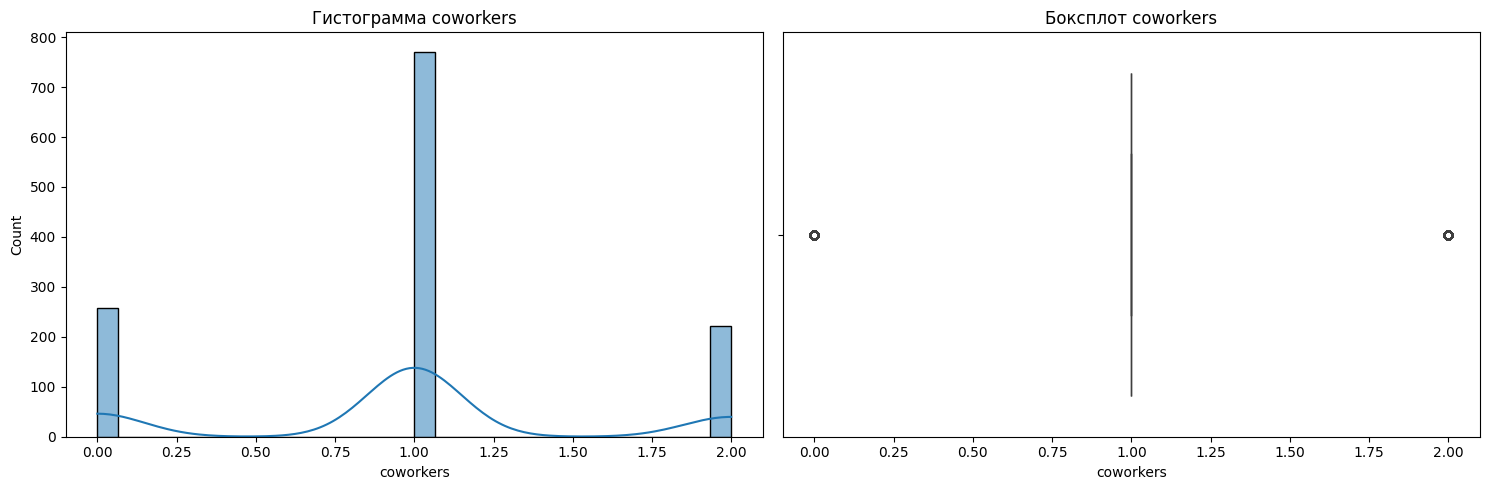

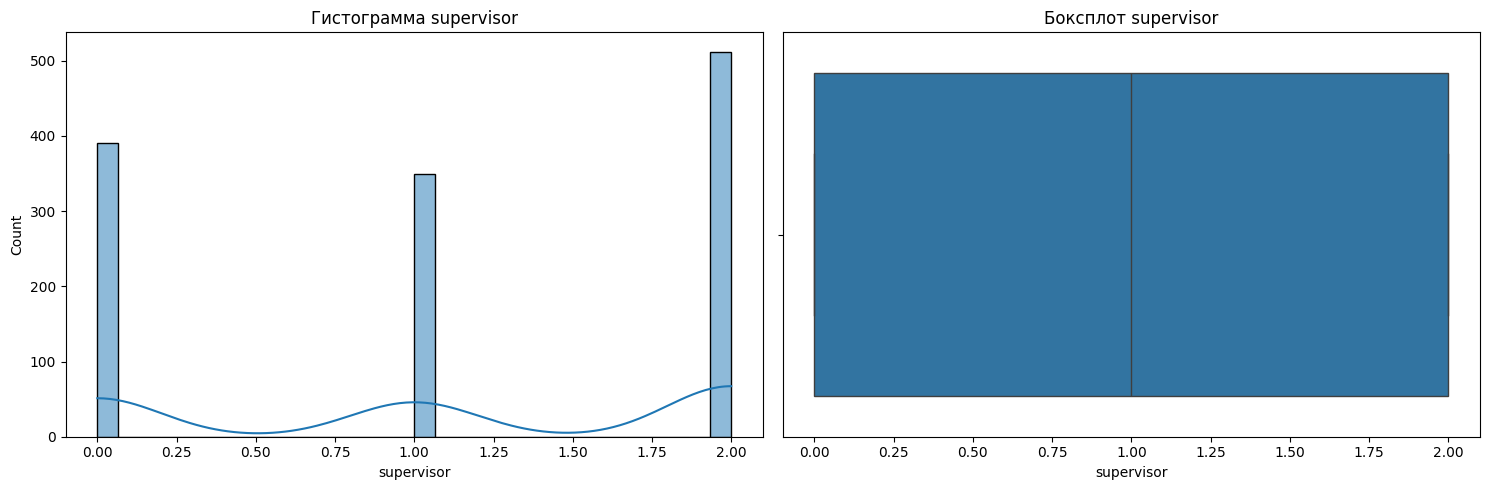

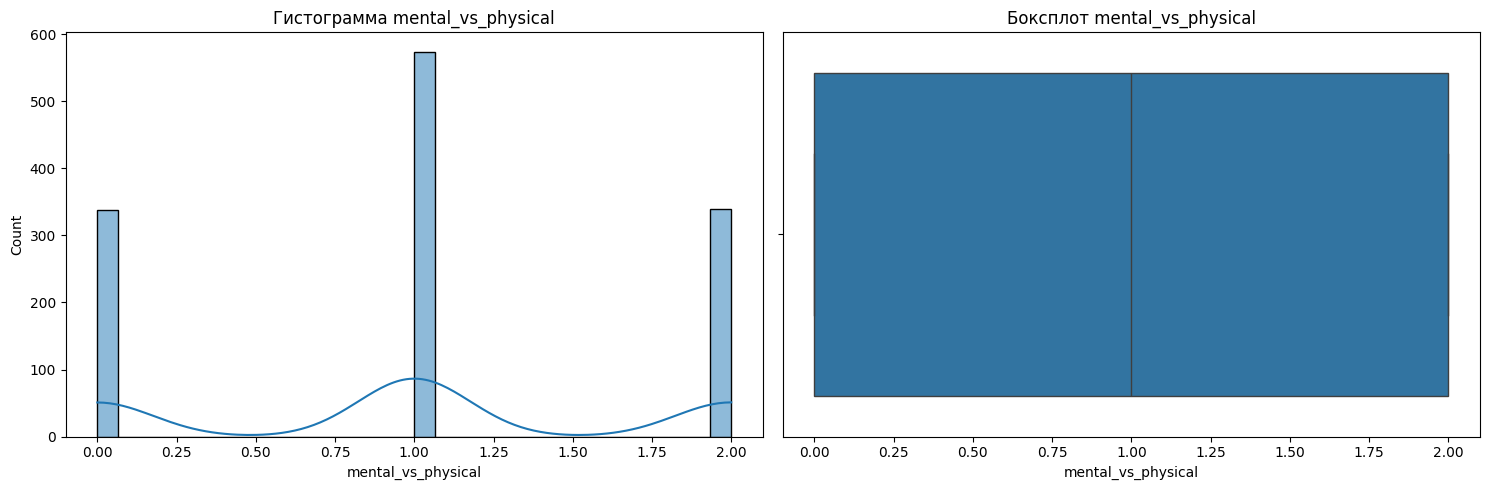

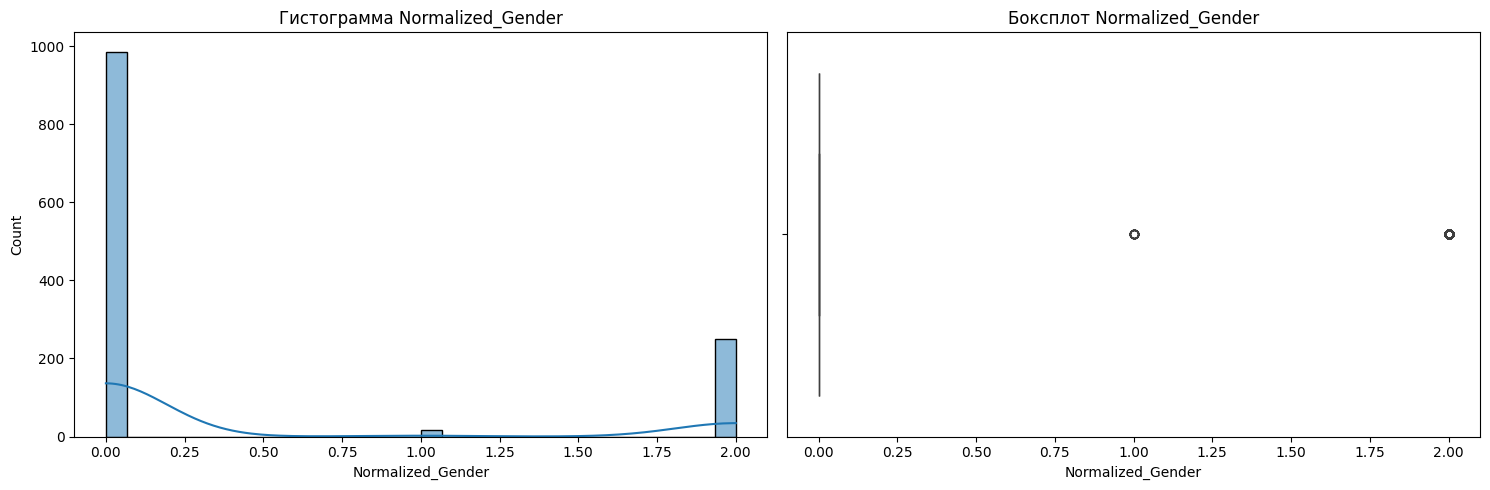

In [33]:
for col in final_df.columns:
    # Создадим графики
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Гистограмма
    sns.histplot(final_df[col], bins=30, ax=axes[0], kde=True)
    axes[0].set_title('Гистограмма ' + col)
    
    # Боксплот
    sns.boxplot(x=final_df[col], ax=axes[1])
    axes[1].set_title('Боксплот ' + col)
    
    # Настройки для более плотной компоновки графиков
    plt.tight_layout()
    plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    final_df.drop(['treatment'], axis=1), # predictive variables
    final_df['treatment'], # target
    test_size=0.2, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1000, 14), (251, 14), (1000,), (251,))

In [37]:
# Сохранение обучающего набора данных
X_train.to_csv('../dataset_processed/X_train.csv', index=False)
y_train.to_csv('../dataset_processed/y_train.csv', index=False)

# Сохранение тестового набора данных
X_test.to_csv('../dataset_processed/X_test.csv', index=False)
y_test.to_csv('../dataset_processed/y_test.csv', index=False)